In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('Fraud_check.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [3]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [4]:
data.duplicated().sum()

0

In [5]:
data.rename(columns = {'Marital.Status':'Marital_status', 'Taxable.Income':'Taxable_income','City.Population':'City_population', 'Work.Experience':'Work_experience'}, inplace = True)

In [6]:
# Converting Sales feature into categorical type
taxable_inc = pd.cut(data.Taxable_income, bins=[0, 30000, 100000], labels=['Risky', 'Good'])
data.drop(['Taxable_income'], axis=1, inplace=True)
data.insert(0, 'Taxable_income', taxable_inc)
data

,Taxable_income,Undergrad,Marital_status,City_population,Work_experience,Urban
0,Good,NO,Single,50047,10,YES
1,Good,YES,Divorced,134075,18,YES
2,Good,NO,Married,160205,30,YES
3,Good,YES,Single,193264,15,YES
4,Good,NO,Married,27533,28,NO
...,...,...,...,...,...,...
595,Good,YES,Divorced,39492,7,YES
596,Good,YES,Divorced,55369,2,YES
597,Good,NO,Divorced,154058,0,YES
598,Good,YES,Married,180083,17,NO


In [8]:
label_en = preprocessing.LabelEncoder()
data['Undergrad'] = label_en.fit_transform(data['Undergrad'])
data.Undergrad

0      0
1      1
2      0
3      1
4      0
      ..
595    1
596    1
597    0
598    1
599    0
Name: Undergrad, Length: 600, dtype: int32

In [9]:
data['Marital_status'] = label_en.fit_transform(data['Marital_status'])
data.Marital_status

0      2
1      0
2      1
3      2
4      1
      ..
595    0
596    0
597    0
598    1
599    0
Name: Marital_status, Length: 600, dtype: int32

In [10]:
data['Urban'] = label_en.fit_transform(data['Urban'])
data.Urban

0      1
1      1
2      1
3      1
4      0
      ..
595    1
596    1
597    1
598    0
599    0
Name: Urban, Length: 600, dtype: int32

In [11]:
from sklearn.ensemble import IsolationForest

In [12]:
df_copy = data.copy()
data_encoded = pd.get_dummies(df_copy)

In [13]:
# training the isolation forest model
clf = IsolationForest(random_state=10, contamination=.01)
clf.fit(data_encoded)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.01, random_state=10)

In [14]:
# predictions
y_pred_outliers = clf.predict(data_encoded)
data_encoded

,Undergrad,Marital_status,City_population,Work_experience,Urban,Taxable_income_Risky,Taxable_income_Good
0,0,2,50047,10,1,0,1
1,1,0,134075,18,1,0,1
2,0,1,160205,30,1,0,1
3,1,2,193264,15,1,0,1
4,0,1,27533,28,0,0,1
...,...,...,...,...,...,...,...
595,1,0,39492,7,1,0,1
596,1,0,55369,2,1,0,1
597,0,0,154058,0,1,0,1
598,1,1,180083,17,0,0,1


In [15]:
data_encoded['scores'] = clf.decision_function(data_encoded)
data_encoded['anomaly'] = clf.predict(data_encoded.iloc[:, 0:7])
data_encoded

,Undergrad,Marital_status,City_population,Work_experience,Urban,Taxable_income_Risky,Taxable_income_Good,scores,anomaly
0,0,2,50047,10,1,0,1,0.128597,1
1,1,0,134075,18,1,0,1,0.131005,1
2,0,1,160205,30,1,0,1,0.084827,1
3,1,2,193264,15,1,0,1,0.104186,1
4,0,1,27533,28,0,0,1,0.097489,1
...,...,...,...,...,...,...,...,...,...
595,1,0,39492,7,1,0,1,0.095277,1
596,1,0,55369,2,1,0,1,0.075817,1
597,0,0,154058,0,1,0,1,0.067130,1
598,1,1,180083,17,0,0,1,0.141565,1


In [16]:
# Print the outlier data points
data_encoded[data_encoded['anomaly']==-1]

,Undergrad,Marital_status,City_population,Work_experience,Urban,Taxable_income_Risky,Taxable_income_Good,scores,anomaly
16,1,0,34551,29,0,1,0,-0.005177,-1
34,1,0,183767,1,1,1,0,-0.016414,-1
126,1,0,195022,3,1,1,0,-0.016731,-1
168,0,0,167629,30,0,1,0,-0.002113,-1
280,0,0,33184,1,0,1,0,-0.022976,-1
541,1,0,191874,30,1,1,0,-0.006491,-1


In [17]:
data.drop([16, 34, 126, 168, 280, 541], inplace=True)
data

,Taxable_income,Undergrad,Marital_status,City_population,Work_experience,Urban
0,Good,0,2,50047,10,1
1,Good,1,0,134075,18,1
2,Good,0,1,160205,30,1
3,Good,1,2,193264,15,1
4,Good,0,1,27533,28,0
...,...,...,...,...,...,...
595,Good,1,0,39492,7,1
596,Good,1,0,55369,2,1
597,Good,0,0,154058,0,1
598,Good,1,1,180083,17,0


In [19]:
#Model building (Random Forest)
# Splitting data into feature and class
X = data.iloc[:,1:]
Y = data.iloc[:,0]
Y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable_income, Length: 594, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [20]:
X

,Undergrad,Marital_status,City_population,Work_experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [21]:
# Split the data into train and test dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)

In [22]:
# Model building
num_trees = 100
max_features = 2
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features, oob_score=True)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7609039548022598


In [23]:
# for accuracy

model.fit(x_train, y_train)
pred = model.predict(x_train)
accuracy = accuracy_score(y_train, pred)
accuracy

1.0

In [24]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train, pred)
confusion

array([[381,   0],
       [  0,  94]], dtype=int64)

In [25]:
##Prediction on test data
pred_test = model.predict(x_test)
acc_test = accuracy_score(y_test, pred_test)
acc_test

0.7563025210084033

[Text(0.36398467432950193, 0.9666666666666667, 'Work.Experience <= 6.5\ngini = 0.317\nsamples = 300\nvalue = [381, 94]\nclass = Risky'),
 Text(0.09003831417624521, 0.9, 'City.Population <= 176182.0\ngini = 0.198\nsamples = 61\nvalue = [88, 11]\nclass = Risky'),
 Text(0.04980842911877394, 0.8333333333333334, 'Marital_status <= 0.5\ngini = 0.173\nsamples = 57\nvalue = [85, 9]\nclass = Risky'),
 Text(0.01532567049808429, 0.7666666666666667, 'City.Population <= 87052.5\ngini = 0.095\nsamples = 14\nvalue = [19, 1]\nclass = Risky'),
 Text(0.007662835249042145, 0.7, 'gini = 0.0\nsamples = 7\nvalue = [11, 0]\nclass = Risky'),
 Text(0.022988505747126436, 0.7, 'Urban <= 0.5\ngini = 0.198\nsamples = 7\nvalue = [8, 1]\nclass = Risky'),
 Text(0.01532567049808429, 0.6333333333333333, 'gini = 0.0\nsamples = 3\nvalue = [5, 0]\nclass = Risky'),
 Text(0.03065134099616858, 0.6333333333333333, 'Work.Experience <= 2.0\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = Risky'),
 Text(0.022988505747126436, 

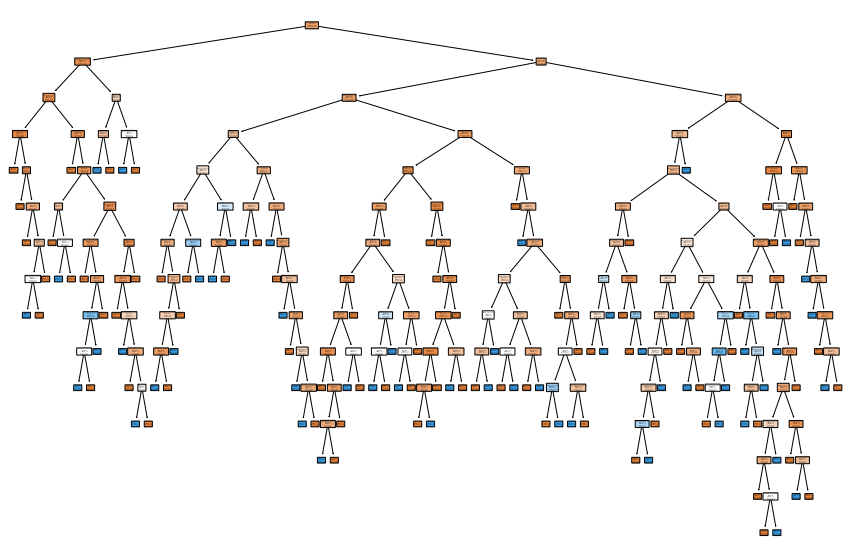

In [29]:
fig = plt.figure(figsize=(15, 10))

fn = [ 'Undergrad', 'Marital_status', 'City.Population',
       'Work.Experience', 'Urban']
cn = ['Risky', 'Good']

plot_tree(model.estimators_[0], 
          feature_names=fn,
          class_names=cn, 
          filled=True, impurity=True, 
          rounded=True)